# Convolution and Sparsity
**Overview**
* Part 1: Orthogonal Matching Pursuit
    * Signal generation
    * Coefficient estimation with a sparsiy constraint
* Part 2: Circular convolution and its matrix form
    * Circular convolution
    * Matrix form with a circulant matrix
* Part 3: Convolutional Autoencoder
    * Transposed convolution
    * Autoencoder with convolutions and deconvolutions


# Part 1: Orthogonal Matching Pursuit


Using orthogonal matching pursuit for recovering a sparse signal from a noisy
measurement encoded with a dictionary


## Compute the main results

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

In [4]:
n_components = 512 
n_features = 100
n_nonzero_coefs = 6 #17

# generate the data
y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)

In [5]:
print(X.shape)
print(w.shape)
print(y.shape)

(100, 512)
(512,)
(100,)


###  Question 1: what is the relationship between y, X and w?

#### Answer:

$y = Xw$
 
$|x|_0$ = n_nonzero_coefs

### Question 2: what is the nature of X? Compute the variance of each column of X. How to interpret it?

#### Answer:

In [6]:
# Code here

$X$ is a random matrix with coefficients following a normal distribution (zero mean and unit variance).

The columns of $X$ are normalized (Euclidean norm = 1).

In [7]:
S = np.sqrt(np.sum((X ** 2), axis=0))
print(S.shape)
print(S[0:10])

(512,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
print(X.shape)

(100, 512)


### Question 3: what is "idx" in the following cell?

In [9]:
idx, = w.nonzero()

print(idx)
print(w[idx])

[123 195 226 268 269 494]
[ 0.07264699  1.58380476 -0.87322229  1.68550553 -2.73865906 -0.24061129]


#### Answer:

It is the indices of the non-zero coefficients in w.

In [10]:
# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

### Question 4: what is the goal of the following cell? How does it work?

#### Answer:

It computes an estimate of $w$. It performs the Orthogonal Matching Pursuit model (OMP). It is a kind of matching pursuit.

The algorithm is developped [here](http://users.cms.caltech.edu/~jtropp/papers/TG07-Signal-Recovery.pdf)

In [11]:
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs, normalize=False)
omp.fit(X, y)
coef = omp.coef_
idx_r1, = coef.nonzero()

In [12]:
print(idx_r1)

[123 195 226 268 269 494]


### Question 5: what is the goal of the following cell? Compare to the previous cell.

#### Answer:

The OMP algorithm is performed on the noisy vector to assess the impact on the noise.

In [13]:
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r2, = coef.nonzero()

### Question 6: what is the goal of the following cell? Compare to the previous cell.

#### Answer:

The OMP algorithm is coupled with a cross-validation. It returns the estimation giving the best mean squared error over the cross-validation folds.

In [14]:
omp_cv = OrthogonalMatchingPursuitCV(cv=5, normalize=False)
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r3, = coef.nonzero()

## Plot all the results

<ipython-input-15-3e49d1801584>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(idx, w[idx])
<ipython-input-15-3e49d1801584>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(idx_r1, coef[idx_r1])
<ipython-input-15-3e49d1801584>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour

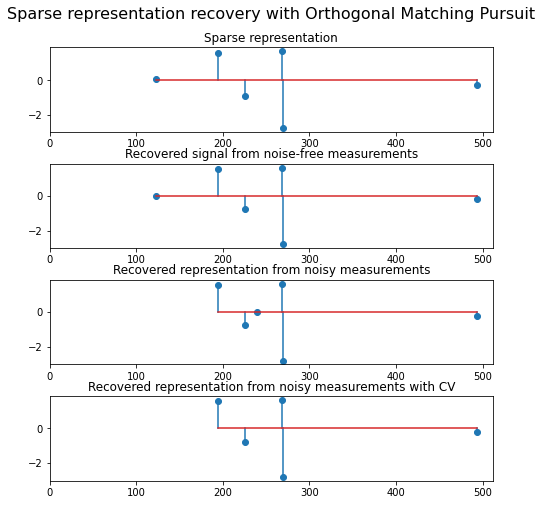

In [15]:
# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, n_components)
plt.title("Sparse representation")
plt.stem(idx, w[idx])

# plot the noise-free reconstruction
plt.subplot(4, 1, 2)
plt.xlim(0, n_components)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r1, coef[idx_r1])

# plot the noisy reconstruction
plt.subplot(4, 1, 3)
plt.xlim(0, n_components)
plt.title("Recovered representation from noisy measurements")
plt.stem(idx_r2, coef[idx_r2])

# plot the noisy reconstruction with number of non-zeros set by CV
plt.subplot(4, 1, 4)
plt.xlim(0, n_components)
plt.title("Recovered representation from noisy measurements with CV")
plt.stem(idx_r3, coef[idx_r3])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse representation recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

### Question 7: choose n_nonzero_coefs = 6. What do you observe? Why?

#### Answer:

The estimation becomes robust to the noise. This is explained by the theory related to matching pursuit.

### Question 8: compute the mutual coherence of the dictionary.

#### Answer:

In [16]:
# Code here

In [18]:
A = np.abs((X.T).dot(X))
print(A)
np.fill_diagonal(A, float('-inf')) # replace the diagonal by a very large negative value
mutual_coherence = np.max(A)
print(mutual_coherence)

[[1.         0.04243703 0.05574444 ... 0.08968792 0.08141358 0.05723222]
 [0.04243703 1.         0.13222254 ... 0.0561085  0.00848647 0.13084127]
 [0.05574444 0.13222254 1.         ... 0.01232809 0.09415678 0.18717825]
 ...
 [0.08968792 0.0561085  0.01232809 ... 1.         0.00473806 0.03582504]
 [0.08141358 0.00848647 0.09415678 ... 0.00473806 1.         0.06517174]
 [0.05723222 0.13084127 0.18717825 ... 0.03582504 0.06517174 1.        ]]
0.46469624879461746


# Part 2: Circular convolution and its matrix form

In [19]:
%matplotlib inline

In [20]:
import numpy as np
from scipy.linalg import circulant
from scipy.fftpack import fft, ifft

from scipy import signal
import matplotlib.pyplot as plt

## The following function computes the circular convolution of two arrays

In [21]:
def convcirc(sig,ker):
    '''
        sig: real 1D array
        ker: real 1D array
        sig and ker must have same shape
    '''
    c = ifft(fft(sig) * fft(ker)).real
    return c

### Question 1: verify by hand the result of the following circular convolution.

In [22]:
kernel = [2, 1, 0, -1]; # kernel
sig = [1, 2, 3, 5]; # signal
c = convcirc(sig,kernel)
print(c)


[ 5.  2.  3. 12.]


## Comparison with the matrix form by using a circulant matrix

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.circulant.html

### Question 2: use the function "circulant" to get the appropriate circulant matrix D

#### Answer:

In [23]:
# Code here

In [24]:
D = circulant(kernel)
print(D)

[[ 2 -1  0  1]
 [ 1  2 -1  0]
 [ 0  1  2 -1]
 [-1  0  1  2]]


### Question 3: compute the circular convolution with an appropriate matrix multiplication

#### Answer:

In [25]:
# Code here

In [26]:
c2 = D.dot(sig)
print(c2)

[ 5  2  3 12]


### Question 4: generate a circulant matrix with the kernel given in the next cell. Print the matrix. What structure do you observe?

In [27]:
kernel = [1, 2, 3, 0, 0, 0]; # kernel
# Fill in the cell

#### Answer:

In [28]:
# Code here

In [29]:
D = circulant(kernel)
print(D)

[[1 0 0 0 3 2]
 [2 1 0 0 0 3]
 [3 2 1 0 0 0]
 [0 3 2 1 0 0]
 [0 0 3 2 1 0]
 [0 0 0 3 2 1]]


## Illustration of a circular convolution with longer arrays

In [30]:
sig = np.repeat([0., 1., 0.], 100)
ker = signal.hann(20) # a Hann window

In [31]:
print(ker)

[0.         0.02709138 0.10542975 0.22652592 0.37725726 0.54128967
 0.70084771 0.83864079 0.93973688 0.99318065 0.99318065 0.93973688
 0.83864079 0.70084771 0.54128967 0.37725726 0.22652592 0.10542975
 0.02709138 0.        ]


### Question 5: form "kerExt" by padding "ker" with zeros. The length of "kerExt" should be the length of "sig".

#### Answer:

In [32]:
# Modify this cell
kerExt = 0*sig

In [33]:
co = np.zeros((sig.shape[0]-ker.shape[0],1)).squeeze()
kerExt = np.concatenate((ker, co),axis=0)
print(sig.shape)
print(ker.shape)
print(kerExt.shape)

(300,)
(20,)
(300,)


In [34]:
# Compute the circular convolution
filtered = convcirc(sig,kerExt)

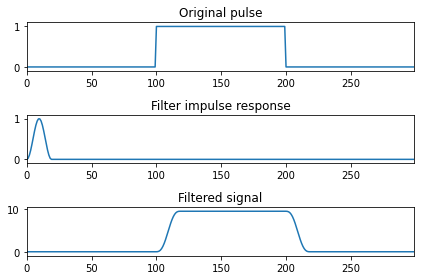

In [35]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1)#, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(kerExt)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()

# Part 3: Sparsity within an autoencoder: Convolutional Autoencoder with Deconvolutions

We will train an autoencoder and check whether the internal representaton is sparse.

The convolutional autoencoder use convolutional layers that compress 784-pixel MNIST images down to a 1024 values internal representation without using pooling operations but increasing the stride in convolutional layers. The internal representation should be sparse.

This lab should run on GPU (the neural network training is ressource demanding!)


## Import libraries and MNIST dataset

In [36]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

%matplotlib inline
import matplotlib.pyplot as plt

from torchvision import utils

##########################
### SETTINGS
##########################

#Completely reproducible results are not guaranteed across PyTorch releases, individual commits, 
# or different platforms. Furthermore, results may not be reproducible between CPU and GPU executions, 
# even when using identical seeds.
# See more details on https://pytorch.org/docs/stable/notes/randomness.html
# The following commands limit the randomness.

random_seed = 56534 
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)

Device: cuda:0


In [37]:
##########################
### MNIST DATASET
##########################

# Batch size
batch_size = 128

# Note transforms.ToTensor() scales input images to 0-1 range
# See details on https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True,
                          drop_last=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False,
                         drop_last=True)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


## Deconvolution as a transposed convolution

**Transposed convolution**

Consider implementing the convolution by multiplying matrices. 

Given an input vector $x$ and a weight matrix $W$ modeling the convolution, the forward propagation function of the convolution can be implemented by multiplying its input with the weight matrix and outputting a vector 
$$
y=Wx,
$$
where $y\in \mathbb{R}^m$, $x\in \mathbb{R}^n$ and $W\in \mathbb{R}^{m\times n}$.

We compute a scalar loss $L$ at the end of the neural network (for example, $L={\|y-t\|}^2_2$ where $t$ is the known label vector). Let us assume that the (column) gradient $\nabla_y L$ is already computed during the backpropagation. We want to compute $\nabla_x L$.

A short calculation shows that
$$
\nabla_x L=W^T \nabla_y L.
$$

Hence, the backpropagation function of the convolution can be implemented by multiplying its input ($\nabla_y L$ in this example) with the transposed weight matrix $W^T$.

More details in https://d2l.ai/chapter_computer-vision/transposed-conv.html

The following code illustrated how nn.ConvTranspose2d is working. This is the standard Pytorch function that implements the transposed convolution in 2D.

In [38]:
# Input
X = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
# Convolution kernel
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])

# since the signature of the function is torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size,...),
# we must reshape X and K
Xr, Kr = X.reshape(1, 1, 2, 2), K.reshape(1, 1, 2, 2)
tconv = torch.nn.ConvTranspose2d(1, 1, kernel_size=2, bias=False)
tconv.weight.data = Kr
Rr = tconv(Xr)
print(Rr)

tensor([[[[ 0.,  0.,  1.],
          [ 0.,  4.,  6.],
          [ 4., 12.,  9.]]]], grad_fn=<ConvolutionBackward0>)


The following picture explains how the trasnsposed convolution works in practice. The kernel pattern is weighted and plugged-in the output.

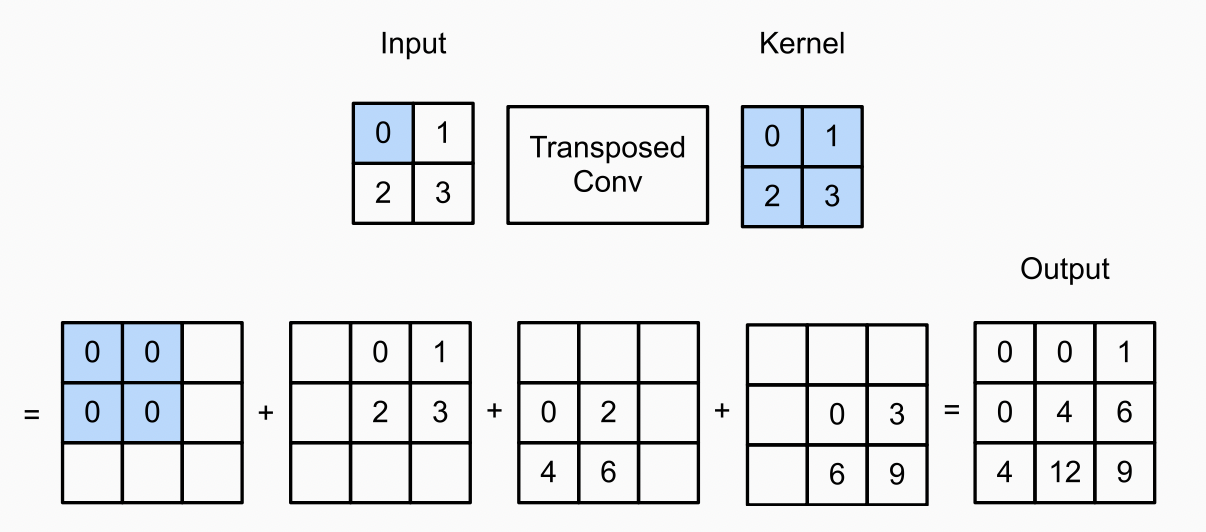

The following cell implements the transposed convolution as it is explained in the picture below. It is easy to check that the result is exactly what we expect. 

In [39]:
def trans_conv(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] + h - 1, X.shape[1] + w - 1))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Y[i: i + h, j: j + w] += X[i, j] * K
    return Y

R = trans_conv(X, K)
print(R)

tensor([[ 0.,  0.,  1.],
        [ 0.,  4.,  6.],
        [ 4., 12.,  9.]])


###Question: is the transposed convolution the inverse of a convolution?

**Answer**:

Definitively not, but it is a good tool to get a reasonnable estimate of the input before the convolution.

## Model

### Question 1: implement a convolutional autoencoder with 3 convolution layers and 3 deconvolution layers (i.e., transposed convolutions).

The three convolutions are:
- First convolution: kernel size (8,8), stride (2,2), no padding, number of output channels 128
- Second convolution: kernel size (8,8), stride (2,2), no padding, number of output channels 256
- First convolution: kernel size (8,8), stride (2,2), no padding, number of output channels 1024

The deconvolutions must be consistent with the convolutions.

After each convolution and deconvolution, use a ReLU activation function, except the last deconvolution that is followed by a sigmoid (the output musy be in [0, 1] as the input).

We want to study the internal represensations of the autoencoder. Hence, the forward function of the convolutional autoencoder must return both the internal state (also called the code) after the 3 convolutions and the final output.

The autoencoder is illustrated in the figure below.

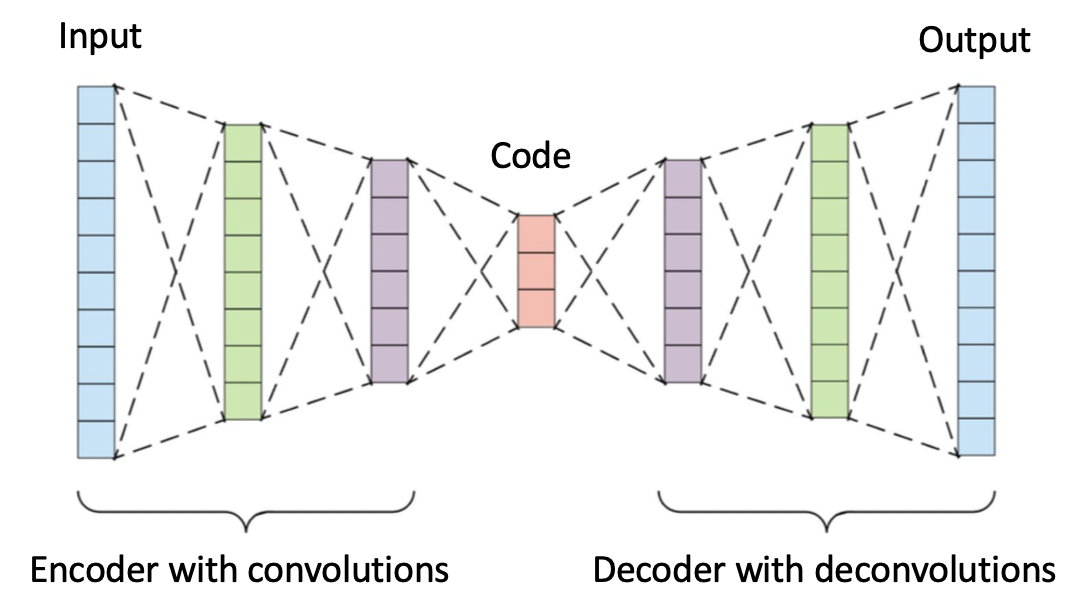

In [40]:
##########################
### MODEL
##########################

class ConvolutionalAutoencoder(torch.nn.Module):

    def __init__(self):
        super(ConvolutionalAutoencoder, self).__init__()
        
        # Dimensions of output after a convolution:
        # w: input size, k: kernel size, p: padding, s: stride
        # (w - k + 2*p)/s + 1 = o

        self.nbchannel = 1 # number of input channels
        self.f1 = 128 #64  
        self.f2 = 256 #128 
        self.f3 = 1024  

        
        ### ENCODER
        
        # 28x28x1 => 11x11x128  
        self.conv_1 = torch.nn.Conv2d(in_channels=self.nbchannel,
                                      out_channels=self.f1,
                                      kernel_size=(8, 8),
                                      stride=(2, 2),
                                      padding=0)
        
        # 11x11x128 => 7x7x256
        self.conv_2 = torch.nn.Conv2d(in_channels=self.f1,
                                      out_channels=self.f2,
                                      kernel_size=(5, 5),
                                      stride=(1, 1),
                                      padding=0)   
        # 7x7x256 => 1x1x1024
        self.conv_3 = torch.nn.Conv2d(in_channels=self.f2,
                                      out_channels=self.f3,
                                      kernel_size=(7, 7),
                                      stride=(1, 1),
                                      padding=0)                
        
        ### DECODER
                                         
        # 1x1x1024 => 7x7x256                          
        self.deconv_1 = torch.nn.ConvTranspose2d(in_channels=self.f3,
                                                 out_channels=self.f2,
                                                 kernel_size=(7, 7),
                                                 padding=0)
        
        # 7x7x256 => 11x11x128                          
        self.deconv_2 = torch.nn.ConvTranspose2d(in_channels=self.f2,
                                                 out_channels=self.f1,
                                                 kernel_size=(5, 5),
                                                 padding=0)
        
        # 11x11x128  => 28x28x1 
        self.deconv_3 = torch.nn.ConvTranspose2d(in_channels=self.f1,
                                                 out_channels=1,
                                                 kernel_size=(8, 8),
                                                 stride=(2, 2),
                                                 padding=0)     
        
    def forward(self, x):
        
        ### ENCODER
        x = self.conv_1(x)
        x = F.relu(x)
        x = self.conv_2(x)
        x = F.relu(x)
        x = self.conv_3(x)
        x = F.relu(x)
        state = x.clone() # we return this value, so it is preferable to clone it
          
        ### DECODER
        x = self.deconv_1(x)  
        x = F.relu(x)
        x = self.deconv_2(x)
        x = F.relu(x)
        x = self.deconv_3(x)
        x = torch.sigmoid(x)
        return x, state 


## Training

### Question 2: train the autoencoder with the Adam optimizer and the binary cross entropy as the loss.

In [41]:
# Hyperparameters
learning_rate = 0.005
num_epochs = 2 #5

model = ConvolutionalAutoencoder() # Instanciate the model
model = model.to(device) # CPU => GPU

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss = F.binary_cross_entropy

In [42]:
start_time = time.time()

for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        # ONLY NEED THE IMAGES (CALLED FEATURES)
        features = features.to(device)

        ### FORWARD AND BACK PROP
        decoded, state = model(features)
        cost = loss(decoded, features)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### PRINT USER INFORMATION
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_loader), cost))
            
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/002 | Batch 000/468 | Cost: 0.6961
Epoch: 001/002 | Batch 050/468 | Cost: 0.2163
Epoch: 001/002 | Batch 100/468 | Cost: 0.1291
Epoch: 001/002 | Batch 150/468 | Cost: 0.1059
Epoch: 001/002 | Batch 200/468 | Cost: 0.1034
Epoch: 001/002 | Batch 250/468 | Cost: 0.0910
Epoch: 001/002 | Batch 300/468 | Cost: 0.0881
Epoch: 001/002 | Batch 350/468 | Cost: 0.0875
Epoch: 001/002 | Batch 400/468 | Cost: 0.0809
Epoch: 001/002 | Batch 450/468 | Cost: 0.0781
Time elapsed: 1.42 min
Epoch: 002/002 | Batch 000/468 | Cost: 0.0822
Epoch: 002/002 | Batch 050/468 | Cost: 0.0833
Epoch: 002/002 | Batch 100/468 | Cost: 0.0769
Epoch: 002/002 | Batch 150/468 | Cost: 0.0770
Epoch: 002/002 | Batch 200/468 | Cost: 0.0756
Epoch: 002/002 | Batch 250/468 | Cost: 0.0761
Epoch: 002/002 | Batch 300/468 | Cost: 0.0757
Epoch: 002/002 | Batch 350/468 | Cost: 0.0781
Epoch: 002/002 | Batch 400/468 | Cost: 0.0757
Epoch: 002/002 | Batch 450/468 | Cost: 0.0741
Time elapsed: 2.73 min
Total Training Time: 2.73 min


## Evaluation

### Question 3: plot 10 input images and compare them to the reconstructed images returned by the autoencoder.




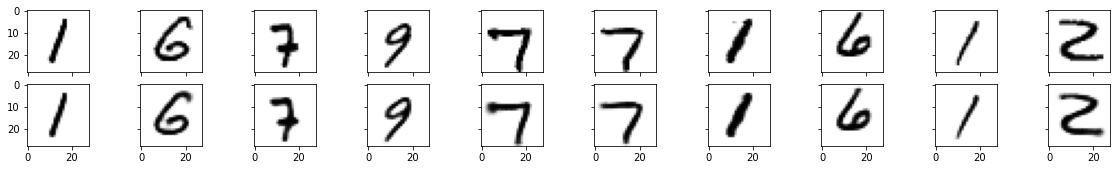

In [43]:
##########################
### VISUALIZATION
##########################

n_images = 10
image_width = 28

fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))

orig_images = features[:n_images].clone().detach().cpu()
decoded_images = decoded[:10].clone().detach().cpu()

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, decoded_images]):
        curr_img = img[i]
        ax[i].imshow(curr_img.view((image_width, image_width)), cmap='binary')

### Question 4: compute and get the internal states of an input data batch. Count the average number of non-zero elements within the internal state. Is the internal representation sparse? 


In [44]:
data = iter(train_loader)
features, labels = next(data)
decoded, state = model(features.to(device))

# Print the shapes as a reminder
print(features.shape)
print(decoded.shape)
print(state.shape)

# Compute and print the number of non-zero components
print(torch.count_nonzero(state[:,:,0,0],dim=1))
average_nonzero = torch.mean(torch.count_nonzero(state[:,:,0,0],dim=1).float())/state.shape[1]*100
print("Percentage of non-zero components =", average_nonzero.item())


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1024, 1, 1])
tensor([66, 64, 63, 65, 64, 63, 66, 64, 65, 66, 62, 61, 67, 65, 66, 64, 64, 67,
        61, 64, 63, 65, 65, 61, 65, 62, 61, 66, 63, 63, 64, 64, 65, 65, 64, 63,
        65, 64, 63, 67, 64, 64, 66, 63, 62, 61, 64, 65, 61, 60, 62, 65, 62, 63,
        65, 65, 64, 65, 64, 66, 67, 63, 66, 64, 65, 59, 67, 62, 63, 63, 65, 62,
        65, 64, 64, 64, 63, 66, 60, 65, 63, 64, 64, 63, 61, 63, 65, 64, 63, 65,
        66, 63, 64, 65, 63, 63, 61, 65, 61, 63, 65, 59, 64, 65, 62, 65, 67, 65,
        64, 63, 66, 60, 66, 64, 62, 62, 65, 65, 66, 64, 63, 62, 63, 64, 66, 61,
        64, 63], device='cuda:0')
Percentage of non-zero components = 6.230926513671875


**Answer:**

The internal representation is sparse. About 60 values are necessary to describe an input image accurately in this simuation.